In [1]:
import pandas

size_log = pandas.read_pickle("4-generated-mdps/success.pkl.gz")
aborts = pandas.read_pickle("4-generated-mdps/fail.pkl.gz")

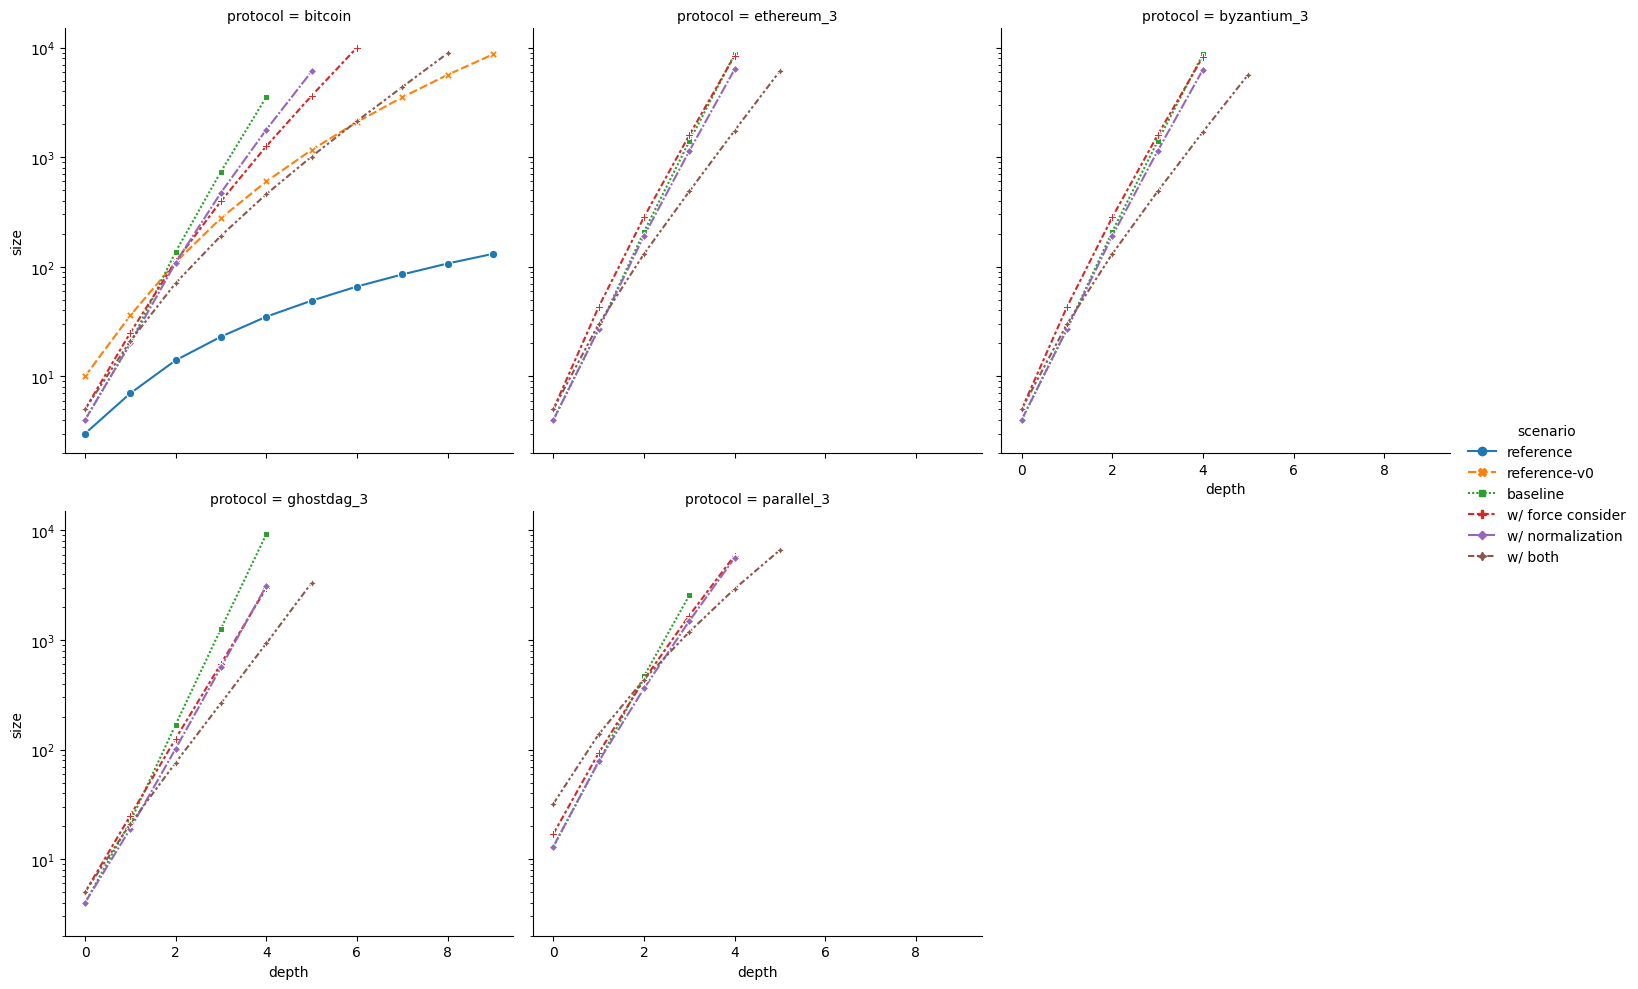

In [2]:
import seaborn

seaborn.relplot(
    data=size_log.query("depth < 10"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
    style="scenario",
    markers=True,
    col="protocol",
    col_wrap=3,
).set(yscale="log")

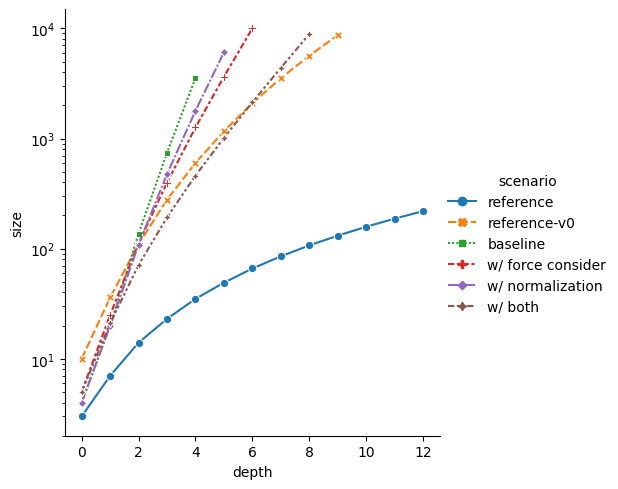

In [3]:
seaborn.relplot(
    data=size_log.query("protocol == 'bitcoin' and depth < 13"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
    style="scenario",
    markers=True,
).set(yscale="log")

In [4]:
scenario_labels = {
    "reference": "reference-fc16",
    "reference-v0": "drop",
    "baseline": "baseline",
    "w/o garbage collection": "baseline-gc",
    "w/ force consider": "baseline+fc",
    "w/ normalization": "baseline+n",
    "w/ both": "baseline+fc+n",
}

depth_cutoff = max(size_log.query("scenario != 'reference'").depth) + 1

btc_size = (
    size_log.assign(scenario=[scenario_labels[x] for x in size_log.scenario])
    .query("scenario != 'drop'")
    .query("protocol == 'bitcoin'")
    .query(f"depth <= {depth_cutoff}")
    .pivot(index="depth", columns="scenario", values="size")
)

btc_size.to_csv("5-state-space-exploration-viz-for-paper-btc-size.csv")
btc_size

scenario,baseline,baseline+fc,baseline+fc+n,baseline+n,reference-fc16
depth,,,,,
0,4.0,5.0,5.0,4.0,3.0
1,20.0,25.0,21.0,20.0,7.0
2,137.0,112.0,71.0,109.0,14.0
3,740.0,397.0,192.0,475.0,23.0
4,3542.0,1260.0,460.0,1783.0,35.0
5,NaN,3640.0,1013.0,6056.0,49.0
6,NaN,9998.0,2134.0,NaN,66.0
7,NaN,NaN,4373.0,NaN,85.0
8,NaN,NaN,8865.0,NaN,107.0


In [5]:
# how should we report on the other protocols?
# column a: show max depth explored in table for fully optimized exploration only; calculate blow up factor and add as columns


def tabulate_deepest(d):
    return d.iloc[d.groupby(["scenario", "protocol"]).depth.idxmax()]


deepest = (
    tabulate_deepest(size_log)
    .reset_index(drop=True)
    .query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
)

deepest.to_pickle("4-generated-mdps/deepest.pkl.gz")

deepest

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,depth,size,time_spent,rss,mdp
0,baseline,generic_1,False,False,True,True,False,bitcoin,4,3542,1.583976,0.165817,258132f6
1,baseline,generic_1,False,False,True,True,False,byzantium_3,4,8685,5.862522,0.217278,74030974
2,baseline,generic_1,False,False,True,True,False,ethereum_3,4,8690,5.442981,0.215614,2439d526
3,baseline,generic_1,False,False,True,True,False,ghostdag_3,4,9231,10.162704,0.217167,73798009
4,baseline,generic_1,False,False,True,True,False,parallel_3,3,2555,1.685983,0.183735,40b6e69a
5,reference,fc16sapirshtein,True,True,True,True,True,bitcoin,88,9947,23.013609,0.168713,77d32b2a
7,w/ both,generic_1,True,True,True,True,False,bitcoin,8,8865,10.164647,0.235722,ebd0fe5c
8,w/ both,generic_1,True,True,True,True,False,byzantium_3,5,5677,7.077602,0.206570,80e5797c
9,w/ both,generic_1,True,True,True,True,False,ethereum_3,5,6122,6.898282,0.206295,7a81a71d
10,w/ both,generic_1,True,True,True,True,False,ghostdag_3,5,3325,6.333782,0.200546,32752d94


In [6]:
# how should we report on the other protocols?
# column b: fix depth in table

fixed_depth = min(deepest.depth)
fixed = (
    size_log.query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
    .query(f"depth == {fixed_depth}")
    .reset_index(drop=True)
)
fixed.to_pickle("4-generated-mdps/fixed.pkl.gz")
fixed

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,depth,size,time_spent,rss,mdp
0,reference,fc16sapirshtein,True,True,True,True,True,bitcoin,3,23,0.159029,0.133991,6205f68c
1,baseline,generic_1,False,False,True,True,False,bitcoin,3,740,0.369479,0.161179,36742e55
2,baseline,generic_1,False,False,True,True,False,ethereum_3,3,1391,1.192166,0.169106,7e3322ee
3,baseline,generic_1,False,False,True,True,False,byzantium_3,3,1391,1.247024,0.175041,45fc8070
4,baseline,generic_1,False,False,True,True,False,ghostdag_3,3,1268,1.447537,0.177250,40cf35f6
5,baseline,generic_1,False,False,True,True,False,parallel_3,3,2555,1.685983,0.183735,40b6e69a
6,w/ force consider,generic_1,True,False,True,True,False,bitcoin,3,397,0.712030,0.180618,211ba346
7,w/ force consider,generic_1,True,False,True,True,False,ethereum_3,3,1587,1.534235,0.184250,22274d31
8,w/ force consider,generic_1,True,False,True,True,False,byzantium_3,3,1587,1.658108,0.186840,5badc29b
9,w/ force consider,generic_1,True,False,True,True,False,ghostdag_3,3,607,1.099605,0.188793,5384ef9c


In [7]:
combined = pandas.DataFrame(
    dict(
        max_depth=deepest.set_index(["scenario", "protocol"]).depth,
        size_at_fixed_depth=fixed.set_index(["scenario", "protocol"])["size"],
    )
).reset_index()
combined

,scenario,protocol,max_depth,size_at_fixed_depth
0,baseline,bitcoin,4,740
1,baseline,byzantium_3,4,1391
2,baseline,ethereum_3,4,1391
3,baseline,ghostdag_3,4,1268
4,baseline,parallel_3,3,2555
5,reference,bitcoin,88,23
6,w/ both,bitcoin,8,192
7,w/ both,byzantium_3,5,487
8,w/ both,ethereum_3,5,487
9,w/ both,ghostdag_3,5,265


In [8]:
fixed_depth

3

In [9]:
combined.query('scenario != "reference"').set_index(["scenario", "protocol"]).unstack(
    level=0
).stack(level=0, future_stack=True).unstack(level=1)

scenario     baseline                       w/ both                      \
            max_depth size_at_fixed_depth max_depth size_at_fixed_depth   
protocol                                                                  
bitcoin             4                 740         8                 192   
byzantium_3         4                1391         5                 487   
ethereum_3          4                1391         5                 487   
ghostdag_3          4                1268         5                 265   
parallel_3          3                2555         5                1186   

scenario    w/ force consider                     w/ normalization  \
                    max_depth size_at_fixed_depth        max_depth   
protocol                                                             
bitcoin                     6                 397                5   
byzantium_3                 4                1587                4   
ethereum_3                  4                1587                4   
ghostdag_3                  4                 607                4   
parallel_3                  4                1674                4   

scenario                         
            size_at_fixed_depth  
protocol                         
bitcoin                     475  
byzantium_3                1139  
ethereum_3                 1139  
ghostdag_3                  563  
parallel_3                 1491